# Sesión #6 

# Programa: 

1. Introducción a `matplotlib`. 
2. Gráficos más utilizados. 
3. Integración con pandas. 

Python tiene muchas bibliotecas complementarias para realizar visualizaciones estáticas o dinámicas. Aquí nos centraremos principalmente en matplotlib y las bibliotecas que se basan en él.

# 1. Introducción a matplotlib
matplotlib es un paquete diseñado para crear gráficos con calidad de publicación (en su mayoría bidimensionales). El proyecto fue iniciado por John Hunter en 2002 para habilitar una interfaz de trazado similar a MATLAB en Python.

matplotlib puede exportar visualizaciones a todos los formatos de gráficos vectoriales y rasterizados comunes (PDF, SVG, JPG, PNG, BMP, GIF, etc.).

Con el tiempo, matplotlib ha generado una serie de kits de herramientas complementarios para la visualización de datos que utilizan matplotlib para su trazado subyacente. Una de ellas es nacida en el mar, que exploraremos más adelante en este capítulo.

In [1]:
# Importar librerías 
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Para hacer las gráficas interactivas en jupyter se puede usar: 
#%matplotlib notebook
# Mejor no, da mucha lata 
# hay que usar plt.close(fig) al final de cada figura para que no la muestre en forma interactiva

Using matplotlib backend: nbAgg


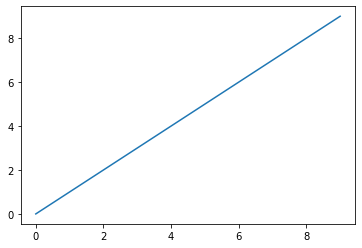

In [2]:
# Primer plot
data = np.arange(10)
plt.plot(data)

## Figuras y Subplots

Los plots en matplotlib están contenidos on objetos del tipo `Figure`, a partir del cual se pueden ir añadiendo elementos. Cada figura contiene uno o más `Axes` (es decir, un área donde los puntos se pueden especificar en términos de coordenadas x-y). 

Se puede crear un objeto `Figure` con la función `figure`, pero esto no muestra nada hasta que se introducen más elementos. 

In [8]:
# Crear un objeto figure
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

Se pueden añadir `subplots` o `Axes` con el método `add_subplot`. Por ejemplo, a continuación creamos un plot de 2x2 elemento a elemento:

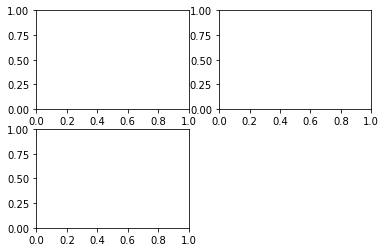

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

Nótese que hemos vuelto a crear el objeto `fig`, esto es porque una característica de Jupyter notebook es que los gráficos se restablecen después de que se evalúa cada celda, por lo que para gráficos más complejos se deben colocar todos los comandos de trazado en una sola celda del cuaderno.

Cuando se escribe un comando de trazado como `plt.plot([1, 2, 3, 1])`, matplotlib se basa en la última figura y subplot utilizada (creando una si es necesario), ocultando así la figura y la creación del subplot.

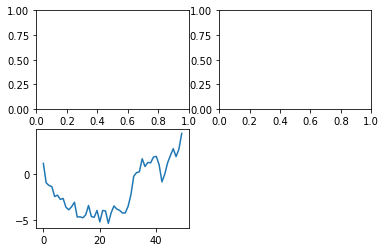

In [17]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum())

Los objetos devueltos por `fig.add_subplot` aquí son objetos `AxesSubplot`, en los que se puede trazar directamente utilizando el método de instancia de cada uno. 

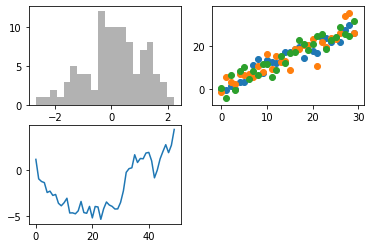

In [20]:
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
fig

# Colores, marcadores y estilos de línea

La función de trazado principal de Matplotlib, `plot`, acepta matrices de coordenadas x-y. Opcionalmente, acepta una abreviatura en string que indica el color y el estilo de línea. Por ejemplo, para trazar x versus y con guiones verdes:

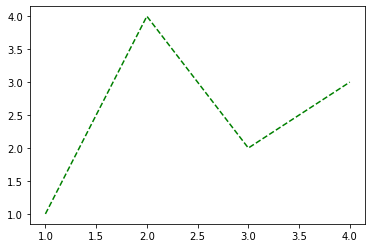

In [27]:
# ax.plot(x, y, 'g--')
plt.plot([1, 2, 3, 4], [1, 4, 2, 3], 'g--')

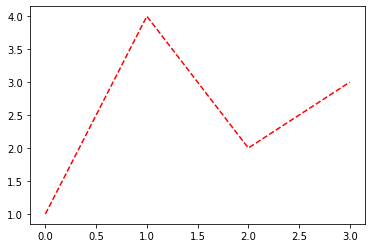

In [29]:
# Nota: si sólo ponemos una lista, usa el id como eje x
# ax.plot(y, 'r--')
plt.plot([1, 4, 2, 3], 'r--')

Esta forma de especificar tanto el color como el estilo de línea se proporciona para su comodidad; en la práctica, si estuviera creando gráficos mediante programación, es posible que prefiera no tener que juntar cadenas para crear gráficos con el estilo deseado. La misma gráfica también podría haberse expresado de manera más explícita como:

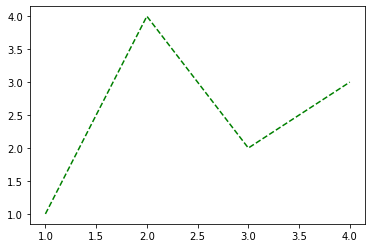

In [30]:
# ax.plot(x, y, linestyle='--', color='g')
plt.plot([1, 2, 3, 4], [1, 4, 2, 3], linestyle='--', color='g')

Se proporcionan varias abreviaturas de colores para los colores de uso común, pero puede usar cualquier color del espectro especificando su código hexadecimal (por ejemplo, '#CECECE').

Los gráficos de líneas también pueden tener marcadores para resaltar los puntos de datos. Dado que matplotlib crea una gráfica de línea continua, interpolando entre puntos, ocasionalmente puede no estar claro dónde se encuentran los puntos. El marcador puede ser parte del string de estilo, que debe tener un color seguido del tipo de marcador y el estilo de línea.

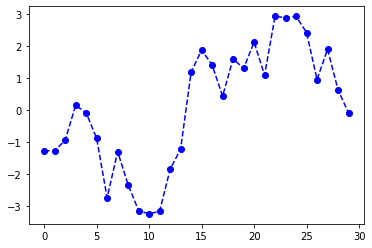

In [33]:
# Ejemplo: 
plt.plot(np.random.randn(30).cumsum(), 'bo--')

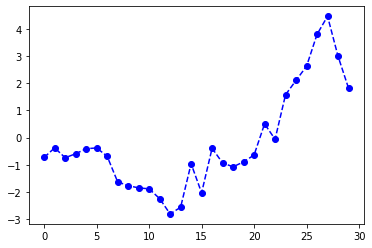

In [36]:
# Más explícitamente:
plt.plot(np.random.randn(30).cumsum(), 
         color='b', linestyle='dashed', marker='o')

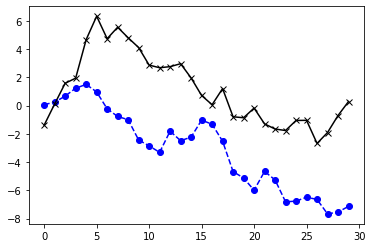

In [40]:
# Más de una línea
plt.plot(np.random.randn(30).cumsum(), 
         color='b', linestyle='dashed', marker='o')
plt.plot(np.random.randn(30).cumsum(), 
         color='k', linestyle='solid', marker='x')

### Recursos útiles
- Linestyles: https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
- Colores: https://matplotlib.org/stable/gallery/color/named_colors.html
- Marcadores: https://matplotlib.org/stable/api/markers_api.html


## Ticks, etiquetas y leyendas
Para la mayoría de decoraciones de Axes, hay dos formas principales de hacer las cosas: usando la interfaz de procedimiento de pyplot (es decir, matplotlib.pyplot) y las herramientas de matplotlib orientadas-a-objetos. 

- Crear explícitamente figuras y Axes, y utilzar métodos sobre estos (el "estilo orientado a objetos (OO)").
- Apoyarse en pyplot para crear y administrar automáticamente las figuras y los Axes, utilizando las funciones de pyplot para trazar.

La documentación y los ejemplos de Matplotlib utilizan ambos enfoques indiferentemente pues son igualmente poderosos. Sin embargo, es preferible elegir uno de ellos y ceñirse a él en lugar de mezclarlos. En general, se sugiere restringir pyplot al trazado interactivo (por ejemplo, en un cuaderno de Jupyter) y preferir el estilo O-O para el trazado no interactivo (en funciones y scripts que están destinados a ser reutilizados como parte de un proyecto más grande).

Ejemplo de OO

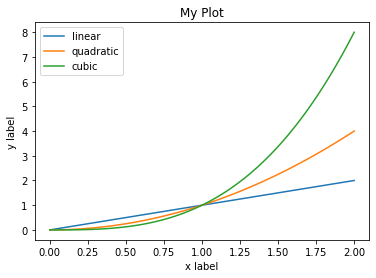

In [44]:
x = np.linspace(0, 2, 100)

fig, ax = plt.subplots()  # Crear una figura y un axes
ax.plot(x, x, label='linear')  # Graficar los datos sobre el axes
ax.plot(x, x**2, label='quadratic')  # ||
ax.plot(x, x**3, label='cubic')  # ||
ax.set_xlabel('x label')  # Añadir etiqueta al eje x del axes
ax.set_ylabel('y label')  # Añadir etiqueta al eje y del axes
ax.set_title("My Plot")  # Añadir título al axes
ax.legend()  # Añadir caja con leyenda

Ejemplo de pyplot: 

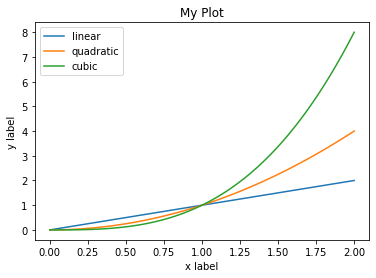

In [43]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')  # Graficar datos sobre un axes implícito 
plt.plot(x, x**2, label='quadratic')  
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("My Plot")
plt.legend()

### Ticks y ticklabels
Para cambiar las marcas del eje x, se pueden usar los métodos `set_xticks` y `set_xticklabels`. El primero indica a matplotlib dónde colocar las marcas a lo largo del rango de datos; de forma predeterminada, estas ubicaciones también serán las etiquetas. Pero podemos establecer cualquier otro valor como etiquetas usando `set_xticklabels`:

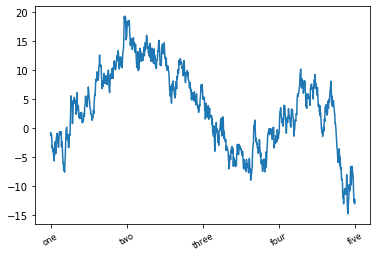

In [5]:
# Ejemplo
fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000]) # Le ponemos nombre para que no lo imprima en la consola
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

Otros métodos para los ejes son: 
- `ax.set_xlim([limite-inferior, limite-superior])`: establece los límites que se muestran en el eje x de ax.
- `ax.set_ylim([limite-inferior, limite-superior])`: establece los límites que se muestran en el eje y de ax.
- `ax.set_yticks(marcas)`: dibuja marcas en el eje y de ax en las posiciones indicadas en la lista marcas.
- `ax.set_xscale(escala)`: establece la escala del eje x de ax, donde el parámetro escala puede ser 'linear' (lineal) o 'log' (logarítmica).
- `ax.set_yscale(escala)`: establece la escala del eje y de ax, donde el parámetro escala puede ser 'linear' (lineal) o 'log' (logarítmica).

## Rejilla o grid
`ax.grid(axis=ejes, color=color, linestyle=estilo)`: dibuja una rejilla en los ejes de `ax`. El parámetro axis indica los ejes sobre los que se dibuja la regilla y puede ser 'x' (eje x), 'y' (eje y) o 'both' (ambos). Los parámetros color y linestyle establecen el color y el estilo de las líneas de la rejilla, y pueden tomar los mismos valores vistos en los apartados de colores y líneas.

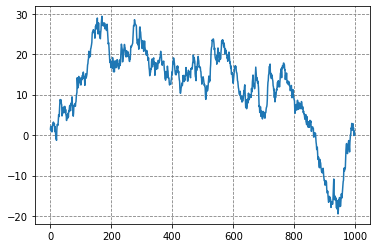

In [35]:
np.random.seed(2021)
fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum())
ax.grid(axis = 'both', color = 'gray', linestyle = 'dashed')

### Anotaciones y dibujos en un subplot
Además de los tipos de gráficos estándar, es posible dibujar sus propias anotaciones de gráficos, que podrían consistir en texto, flechas u otras formas. Puede agregar anotaciones y texto usando las funciones `texto`, `arrow` y `anotate`. 

- `text` dibuja texto en coordenadas dadas (x, y) en el subplot con estilo personalizado opcional. 

Text(800, -10, 'Nice')

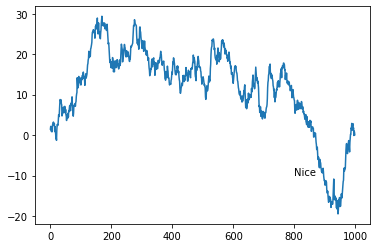

In [68]:
np.random.seed(2021)
fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum())
ax.text(x=800, y=-10, s="Nice")

## Guardar / Exportar gráficas
Puede guardar la figura activa en un archivo usando `plt.savefig`; esto es equivalente al método `savefig` del objeto figure.

El tipo de archivo se infiere de la extensión del archivo utilizada. Se puede exportar a disintos tipos de archivos, entre los más utilizados están pdf, svg, jpg, png, bmp, gif, etc. 

Hay un par de opciones importantes en estas fucniones: `dpi`, que controla la resolución de puntos por pulgada, y `bbox_inches`, que puede recortar el espacio en blanco alrededor de la figura real.

In [ ]:
# Ejemplo 
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')  
plt.plot(x, x**2, label='quadratic')  
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("My Plot")
plt.legend()
#  Para guardar la figura
plt.savefig('Figura1.png', dpi=400, bbox_inches='tight')

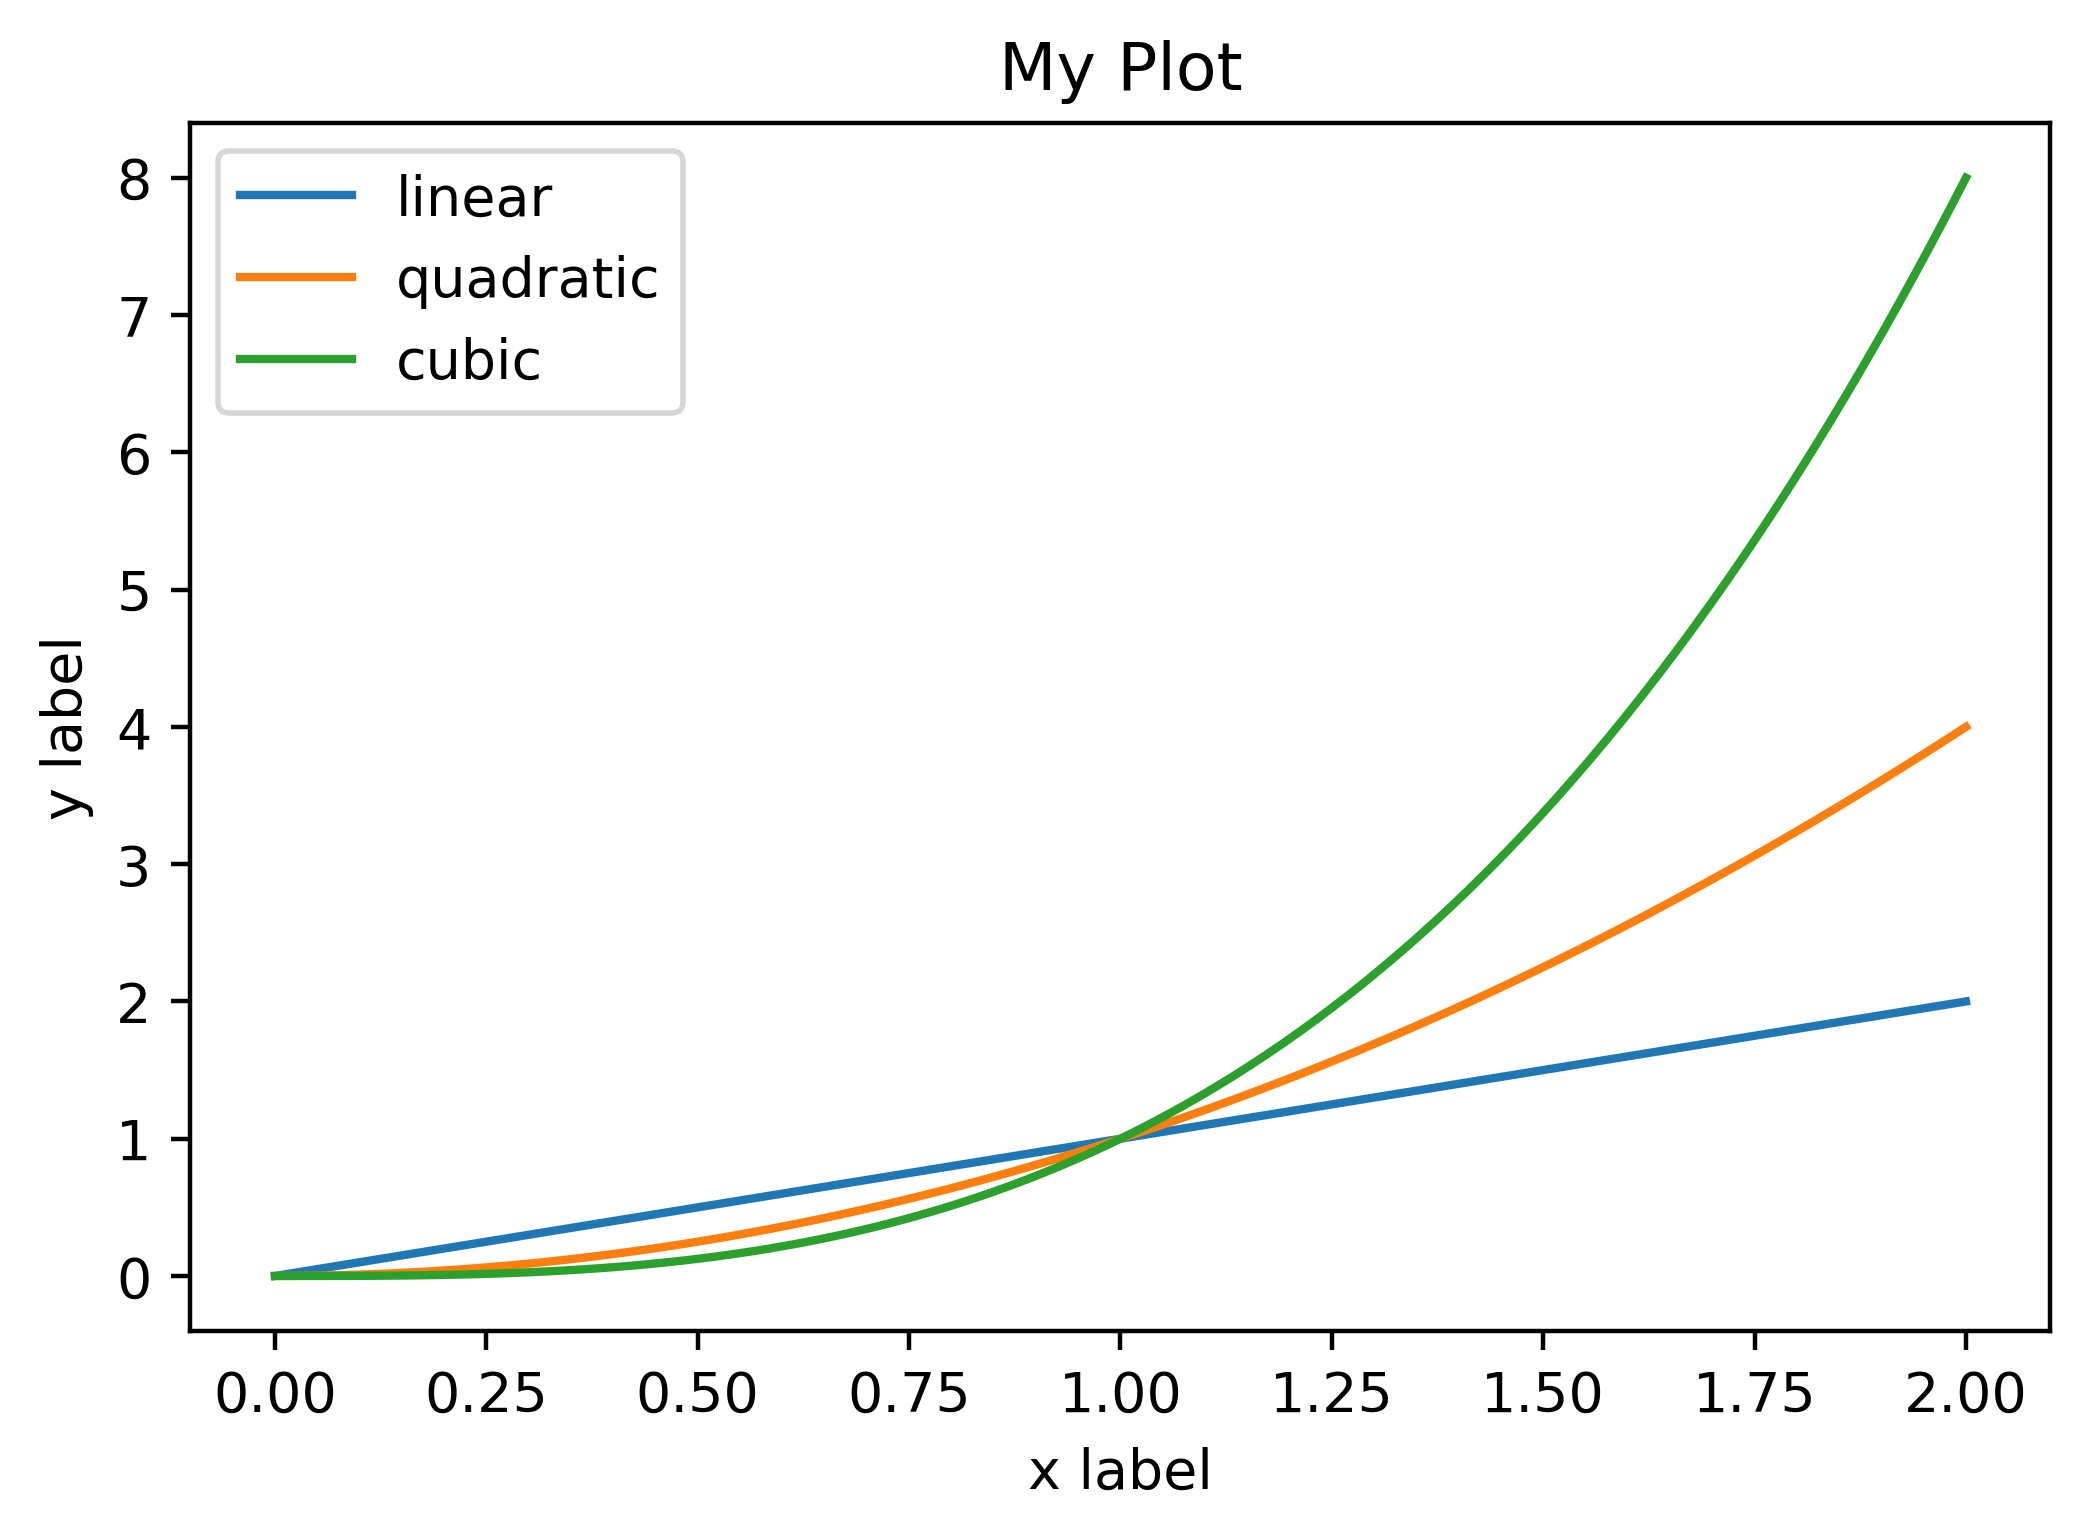

In [3]:
# Para ver la imagen guardada
from IPython.display import Image
Image('Figura1.png')

Se puede encontrar la lista de tipos de archivos admitidos para su sistema utilizando el siguiente método una figura:

In [6]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

# 2. Gráficos más utilizados. 


# Diagrama de dispersión 

`scatter(x, y)`: dibuja un diagrama de puntos con las coordenadas de la lista x en el eje X y las coordenadas de la lista y en el eje Y.

In [ ]:
# Crear la figura y los ejes
fig, ax = plt.subplots()
# Dibujar puntos
ax.scatter(x=np.arange(10), y=np.random.randn(10))

## Diagramas de areas
`fill_between(x, y)`: dibuja el area bajo el polígono con los vértices dados por las coordenadas de la lista x en el eje X y las coordenadas de la lista y en el eje Y. 


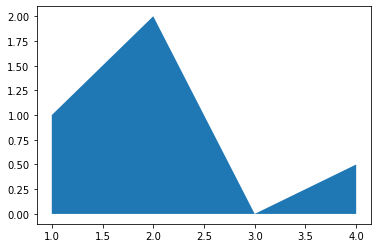

In [16]:
fig, ax = plt.subplots()
ax.fill_between([1, 2, 3, 4], [1, 2, 0, 0.5])

## Diagramas de barras verticales
`bar(x, y)`: dibuja un diagrama de barras verticales donde x es una lista con la posición de las barras en el eje X, e y es una lista con la altura de las barras en el eje Y. 

<BarContainer object of 3 artists>

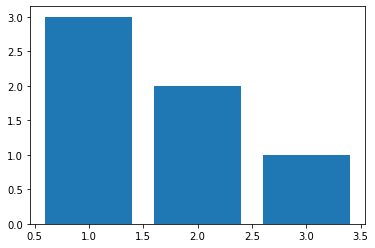

In [17]:
fig, ax = plt.subplots()
ax.bar([1, 2, 3], [3, 2, 1])

## Diagramas de barras horizontales
`barh(x, y)`: dibuja un diagrama de barras horizontales donde x es una lista con la posición de las barras en el eje Y, e y es una lista con la longitud de las barras en el eje X.

<BarContainer object of 3 artists>

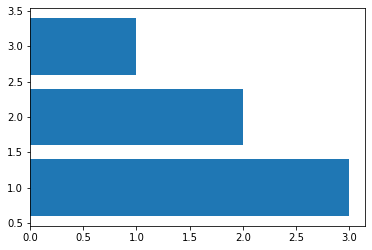

In [19]:
fig, ax = plt.subplots()
ax.barh([1, 2, 3], [3, 2, 1])

## Histogramas
`hist(x, bins)`: dibuja un histograma con las frecuencias resultantes de agrupar los datos de la lista x en las clases definidas por la lista bins.

(array([  3.,  15.,  71., 173., 245., 248., 155.,  69.,  17.,   3.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Patch objects>)

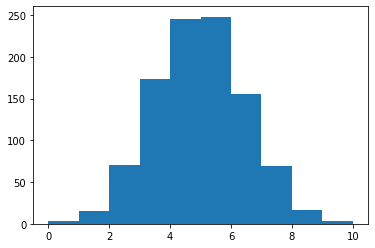

In [20]:
fig, ax = plt.subplots()
x = np.random.normal(5, 1.5, size=1000)
ax.hist(x, np.arange(0, 11))

## Diagramas de pie
`pie(x)`: Dibuja un diagrama de sectores con las frecuencias de la lista x.

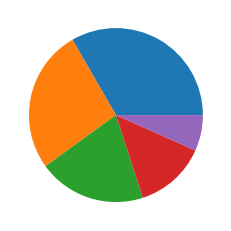

In [22]:
fig, ax = plt.subplots()
ax.pie([5, 4, 3, 2, 1])
plt.show()

## Diagramas de caja 
`boxplot(x)`: dibuja un diagrama de caja y bigotes con los datos de la lista x. 

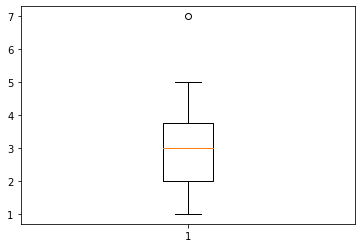

In [26]:
fig, ax = plt.subplots()
ax.boxplot([1, 2, 1, 2, 3, 4, 3, 3, 5, 7])
plt.show()

## Diagramas de contorno
`contourf(x, y, z)`: dibuja un diagrama de contorno con las curvas de nivel de la superficie dada por los puntos con las coordenadas de las listas x, y y z en los ejes X, Y y Z respectivamente.

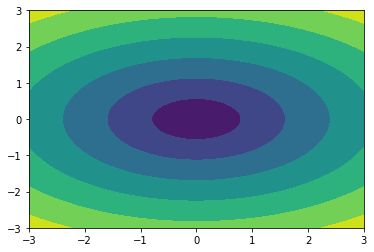

In [27]:
fig, ax = plt.subplots()
x = np.linspace(-3.0, 3.0, 100)
y = np.linspace(-3.0, 3.0, 100)
x, y = np.meshgrid(x, y)
z = np.sqrt(x**2 + 2*y**2)
ax.contourf(x, y, z)
plt.show()

## Mapas de color
`imshow(x)`: dibuja un mapa de color a partir de un array bidimensional x.

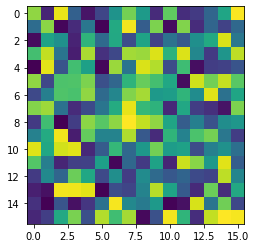

In [29]:
fig, ax = plt.subplots()
x = np.random.random((16, 16))
ax.imshow(x)
plt.show()

# Forma breve
#x = np.random.random((16, 16))
#plt.imshow(x)

# 3. Integración con Pandas
Matplotlib se integra a la perfección con la librería pandas, permitiendo dibujar gráficos a partir de los datos de Series y DataFrames de pandas. La sintaxis principal es la siguiente. 

`df.plot(kind=tipo, x=columnax, y=columnay, ax=ejes)`: dibuja un diagrama del tipo indicado por el parámetro kind en los ejes indicados en el parámetro ax, representando en el eje x la columna del parámetro x y en el eje y la columna del parámetro y. El parámetro kind puede tomar como argumentos 'line' (lineas), 'scatter' (puntos), 'bar' (barras verticales), 'barh' (barras horizontales), 'hist' (histograma), 'box' (cajas), 'density' (densidad), 'area' (area) o 'pie' (sectores). Es posible pasar otros parámetros para indicar el color, el marcador o el estilo de línea como se vió anteriormente.

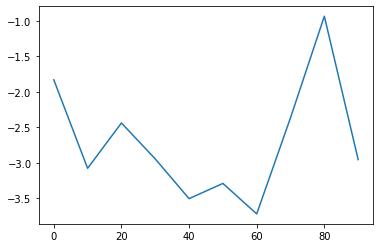

In [36]:
# Ejemplo con Series 
import pandas as pd 
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

El método `plot` de un DataFrame traza cada una de sus columnas como una línea diferente en el mismo axes, creando una leyenda automáticamente. Al igual que antes, toma por defecto el index del DataFrame como argumento en el eje de las x, lo cual por supuesto puede modificarse. 

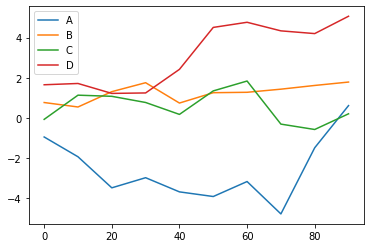

In [41]:
# Ejemplo con un DataFrame
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), 
                  columns=['A', 'B', 'C', 'D'], 
                  index=np.arange(0, 100, 10))
df.plot()

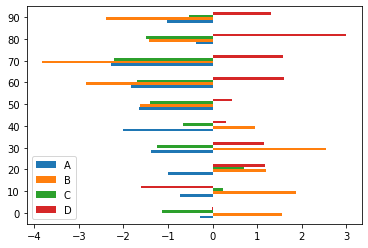

In [45]:
# Ejemplo con un DataFrame
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), 
                  columns=['A', 'B', 'C', 'D'], 
                  index=np.arange(0, 100, 10))
df.plot(kind="barh")

El atributo `plot` contiene una "familia" de métodos para diferentes tipos de gráficas. Por ejemplo, `df.plot()` es equivalente a `df.plot.line()` y `df.plot(kind="barh")` a `df.plot.barh()`. 

In [48]:
# Ejemplo de gráfica de barras
df = pd.DataFrame(np.random.rand(6, 4), 
                  index=['uno', 'dos', 'tres', 'cuatro', 'cinco', 'seis'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Clase'))
df

Clase,A,B,C,D
uno,0.232409,0.968309,0.796514,0.177650
dos,0.572565,0.287274,0.802089,0.575019
tres,0.127949,0.536394,0.923236,0.766842
cuatro,0.990226,0.113366,0.901181,0.777842
cinco,0.802977,0.314550,0.484407,0.102505
seis,0.936533,0.558176,0.286033,0.143382


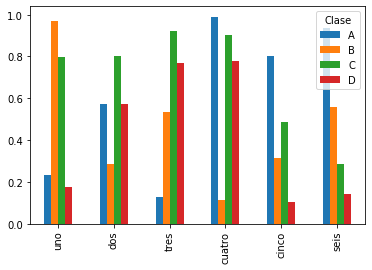

In [50]:
df.plot.bar()
# Nótese que el nombre "Clase" en las columnas del DataFrame se utiliza para dar título a la leyenda.

También se puede crear un gráfico de barras apiladas a partir de un DataFrame usando `stacked=True`, lo que da como resultado que el valor de cada fila se apile. 

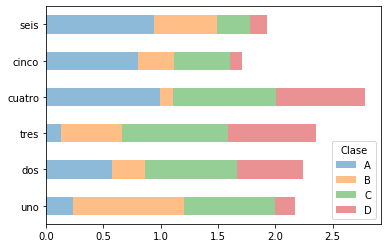

In [51]:
# Ejemplo con la base anterior
df.plot.barh(stacked=True, alpha=0.5)